In [1]:
import pandas as pd
original  = pd.read_csv('../TOP_ZIPUP_2019.txt', sep = "\n", engine='python', encoding = "utf8")
df = original.dropna(axis = 0).reset_index()
del(df['index'])
df.columns = ['text']

import time
Morph = []
run_time = []

In [2]:
from konlpy.tag import Kkma
from collections import Counter
kkma = Kkma()
POS_PASSWORD1 = ['NNG', 'NNP', 'NP', 'UN', 'OL', 'OH']
"""
@ REFERENCE: http://kkma.snu.ac.kr/documents/?doc=postag
NNG: 보통 명사
NNP: 고유 명사
NP: 대명사
UN: 명사추정범주
OL: 외국어
OH: 한자
"""

def preprocess(string):
    rst = ""
    try:
        vocab_pos = kkma.pos(string)
        for key, tag in vocab_pos:
            # if not(tag in POS_STOPWORD):
            if tag in POS_PASSWORD1:
                rst = rst + key + " "
        return rst
    
    except: return None
    
    
df_Kkma = pd.DataFrame()
start = time.time()
for i in range(len(df)):
    df_Kkma = df_Kkma.append({'text' : preprocess(df['text'][i])}, 
                             ignore_index=True)
Morph.append('Kkma')
run_time.append(time.time()-start)
df_Kkma.head()

,text
0,나이키 배색 반집 업 후 리스 봉 봉 빈티지 제품명 나이키 배색 반집 업 후 리스 ...
1,커버 하프 집 업 후 리스 HALF ZIP UP SILKY FLEECE HALF Z...
2,DAY 남미 배낭여행 볼 리비아 라 파 즈 데스 로드 리 리 야경 라 파 즈 시간 ...
3,Made U 스윗 서브 후 리스 반집 업 후드 양털 후드 티 털 상품명 Made U...
4,choiroom 터틀 골지 원피스 니트 세트 뒷면 이룸 베스트 상품 보기 무 배 반...


In [3]:
run_time

[18989.071476221085]

In [4]:
df_Kkma.to_csv("df_Kkma.csv", header=False, index=False)

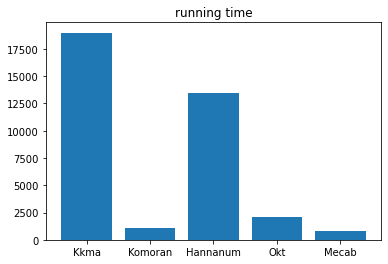

In [6]:
import matplotlib.pyplot as plt
plt.bar(['Kkma', 'Komoran', 'Hannanum', 'Okt', 'Mecab'], 
        [18989.071476221085, 1041.9504737854004, 13424.830045700073, 
        2134.6220133304596, 777.9249513149261])
plt.title("running time")
plt.show()

## 시각화

In [7]:
df_Kkma = pd.read_csv("df_Kkma.csv").dropna()

temp = df_Kkma.values.tolist()
list_Kkma = []
for sentence in temp:
    temp2 = sentence[0].split()
    for vocab in temp2:
        list_Kkma.append(vocab)
series_Kkma = pd.Series(list_Kkma)
Kkma_counts = series_Kkma.value_counts()
Kkma_counts

업              108172
아노락             69499
반집              64336
판매              47507
사이즈             44238
                ...  
쁘띠래                 1
WfiI                1
Arles               1
dm91221-403         1
서광                  1
Length: 36951, dtype: int64

<AxesSubplot:title={'center':'Mecab'}>

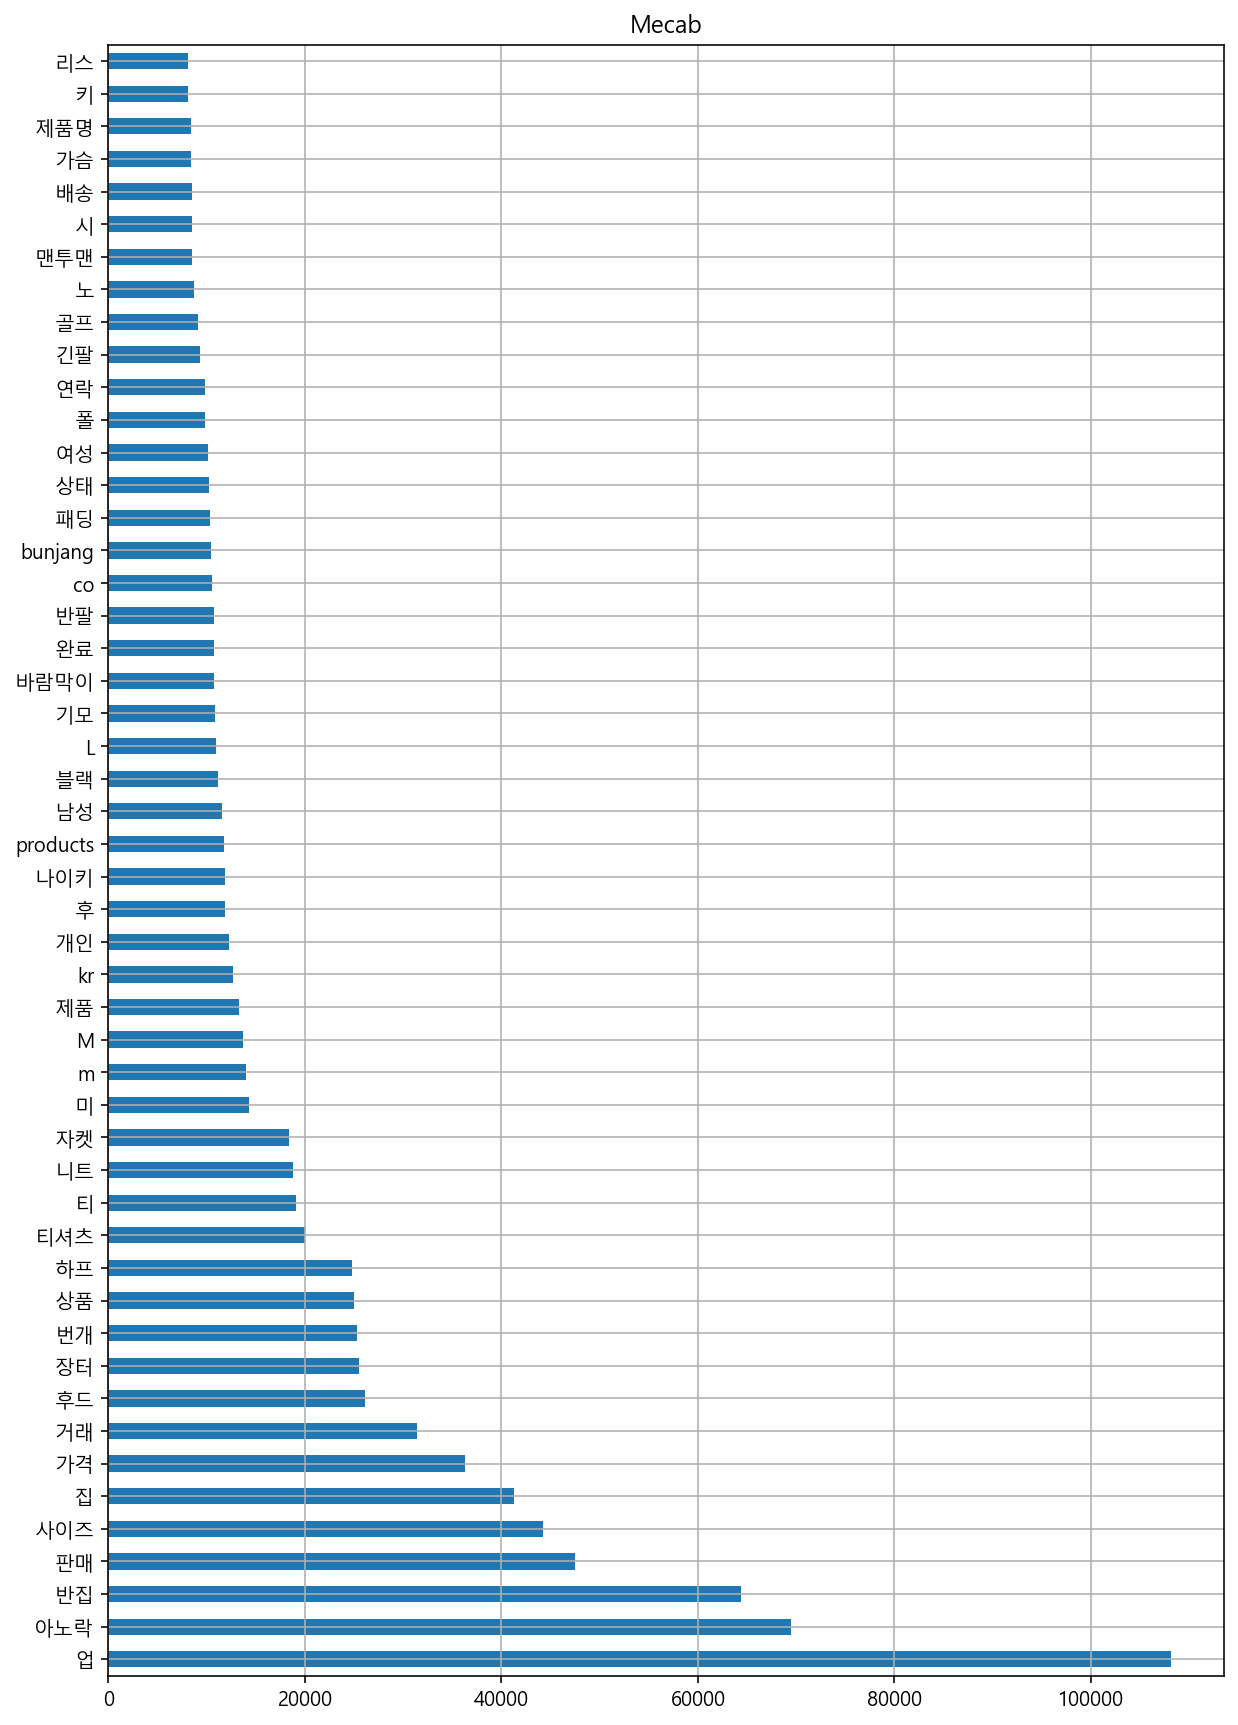

In [8]:
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc('font',family = "Malgun Gothic")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
Kkma_counts.head(50).plot(figsize=(10,15),kind='barh',grid=True, title='Mecab')